## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [18]:
X.isnull().any().any()

False

In [19]:
#Пропущенных значений нет, из категориальных признаков data есть только type, 
#но в Х данной колонки нет -> кодировка не требуется

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
#stratify гарантирует, что разделение происходит так, 
#чтобы соответствующие метки классов были равномерно распределены в обучающей и тестовой выборках.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]
X_train.head()

,alcohol,magnesium
12,13.75,89.0
30,13.73,101.0
36,13.28,110.0
31,13.58,106.0
120,11.45,96.0


<Axes: xlabel='alcohol', ylabel='magnesium'>

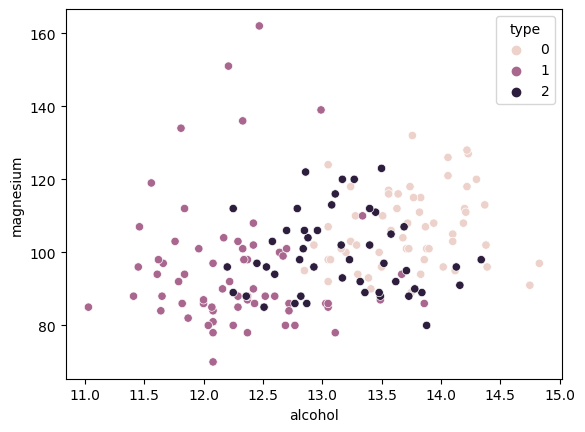

In [25]:
#посмотрим визуализацию распределения типов
import seaborn as sns
df = X
df['type'] = y
sns.scatterplot(x='alcohol',y='magnesium',hue='type',data=df)

In [26]:
#для масштабирования признаков
scaler = StandardScaler()

In [29]:
from sklearn.metrics import accuracy_score
classifiers = []
n = [1, 3, 5, 10, 15, 25]
Train = []
Test = []

for nn in n:
    knn_model = KNeighborsClassifier(n_neighbors=nn)
    knn_model.fit(scaled_X_train, y_train)
    y_pred_train = knn_model.predict(scaled_X_train) 
    y_pred_test = knn_model.predict(scaled_X_test) 
    Train.append(accuracy_score(y_train, y_pred_train))
    Test.append(accuracy_score(y_test, y_pred_test))
    
    classifiers.append(knn_model)

classifiers = np.array(classifiers)

In [31]:
#доля верных
df = pd.DataFrame({'NN': n, 'Test': np.array(Test), 'Train': np.array(Train)})      
df

,NN,Test,Train
0,1,0.555556,1.000000
1,3,0.629630,0.798387
2,5,0.629630,0.782258
3,10,0.648148,0.750000
4,15,0.629630,0.717742
5,25,0.685185,0.693548


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [152]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [32]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

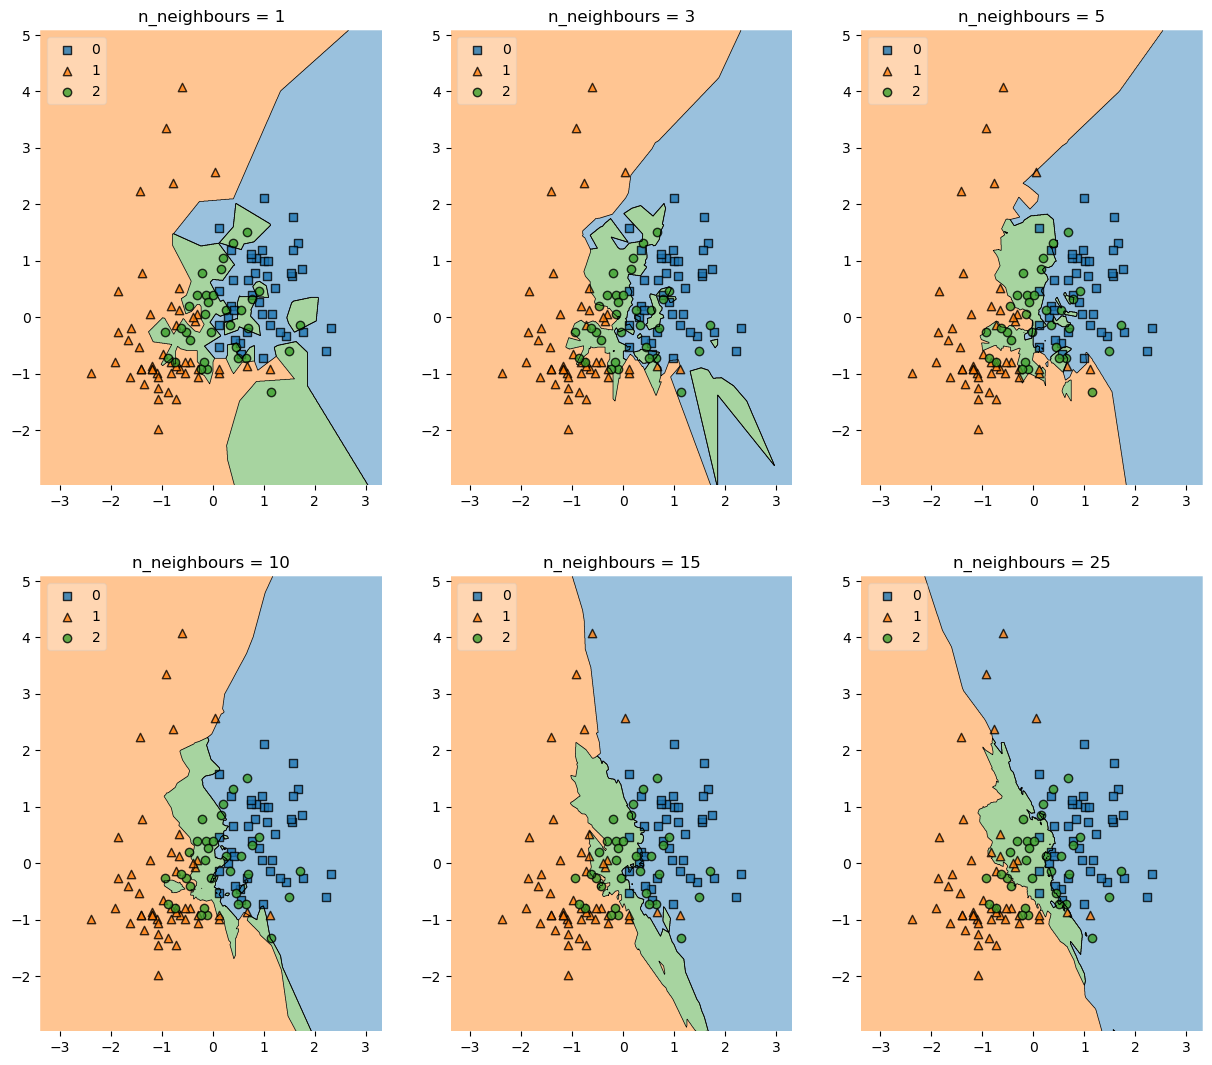

In [34]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 13))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=scaled_X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [35]:
"""
По результатам 1.3 самые лучшие показатели были у knn=10 и knn=25
Геометрически данные результаты подтвердились, я бы использовала knn=25 из-за того, что данное число соседей 
хорошо выделяет зеленые объекты, однако если вычислительные мощности ограничены можно использовать и knn=10, 
скорее всего результаты также будут неплохими

О переобучении явно говорят knn=1 и knn=3
модель просто присваивает значение ближайшег класса, что ведет к слишклм мелкому разбиению и большому кол-ву ошибок
"""

'\nПо результатам 1.3 самые лучшие показатели были у knn=10 и knn=25\n'

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

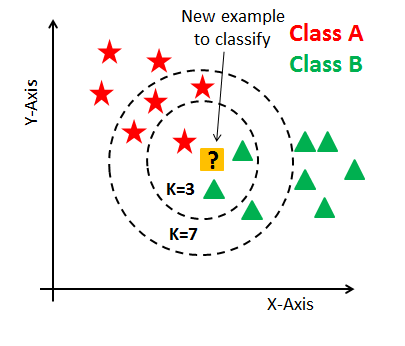

In [36]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.count_distance(x, xt) for xt in self.X_train] #считаем евклидово расстояние
            k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]] #k ближайших
            groups, counts = np.unique(k_nearest, return_counts=True) #считаем какие группы встретились
            predictions.append(groups[np.argmax(counts)]) #выбираем самый частый
        return np.array(predictions)
    
    def count_distance(self, x, y):
        #Евклидова метрика
        return np.sqrt(np.sum((x - y) ** 2))

In [38]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [39]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [40]:
import opendatasets as od

In [41]:
ds = "https://www.kaggle.com/datasets/shivam2503/diamonds"

In [42]:
od.download(ds)

Skipping, found downloaded files in ".\diamonds" (use force=True to force download)


In [43]:
import os

In [44]:
data_dir = ".\diamonds"
os.listdir(data_dir)

['diamonds.csv']

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv('diamonds/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [47]:
data.isnull().any().any() #пропусков нет

False

In [48]:
data = data.drop(['Unnamed: 0'], axis=1) #ненужная колонка, просто индексация с 1

In [49]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [50]:
attributes = data.drop(['cut', 'color', 'clarity'], axis=1)
attributes.corr()['price'].sort_values(ascending=False)
#самая большая корреляция с признаком carat (вес алмаза) и с размером алмаза (x, y, z)
#значит цена больше всего

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
args = ohe.fit_transform(data[['cut', 'color', 'clarity']])
data = pd.concat([data, args], axis=1).drop(columns = ['cut', 'color', 'clarity'])
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [53]:
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaler

StandardScaler()

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(scaled_X_train, y_train)

y_train_pred = lin_model.predict(scaled_X_train)
y_test_pred = lin_model.predict(scaled_X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(mse_train, np.sqrt(mse_train))
print(mse_test, np.sqrt(mse_test))
data['price'].mean()

1290541.9147450614 1136.0202087749415
1244765.435715871 1115.6905645006912


3932.799721913237

In [62]:
#Линейная регрессия работает не очень хорошо, значения могут отклонятся на 25% от реальных, что довольно значимо

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [63]:
coeff_df = pd.DataFrame(abs(lin_model.coef_),X.columns,columns=['Coefficient'])
coeff_df[:6].sort_values(by='Coefficient')
#carat (вес алмаза) и x (длина алмаза) на порядок превышают другие

,Coefficient
y,6.458917
z,34.258945
table,60.332280
depth,90.173817
x,1100.418850
carat,5338.615671


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [64]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10)
lasso_model.fit(scaled_X_train, y_train)
coefs_lasso = pd.DataFrame(abs(lasso_model.coef_),X.columns,columns=['Coefficient'])
coefs_lasso[:6].sort_values(by='Coefficient')

,Coefficient
y,0.000000
z,43.265361
table,47.684857
depth,57.093610
x,652.157442
carat,4872.156396


In [65]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(scaled_X_train, y_train)
coefs_ridge = pd.DataFrame(abs(ridge_model.coef_),X.columns,columns=['Coefficient'])
coefs_ridge[:6].sort_values(by='Coefficient')

,Coefficient
y,9.605149
z,38.071544
table,60.123686
depth,87.639805
x,1057.228888
carat,5301.289062


In [66]:
#веса уменьшились довольно значительно, особенно при использовании L1 регуляризации
# При наличии мультиколлинеарности сложно оценить вклад каждой переменной в объяснение зависимой переменной, 
#так как переменные теряют свою уникальность из-за избыточной корреляции
#В нашем случае например измерения алмаза сильно сказываются на его вес, поэтому довольно сложно
#сделать вывод какой из параметров влияет на цену

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

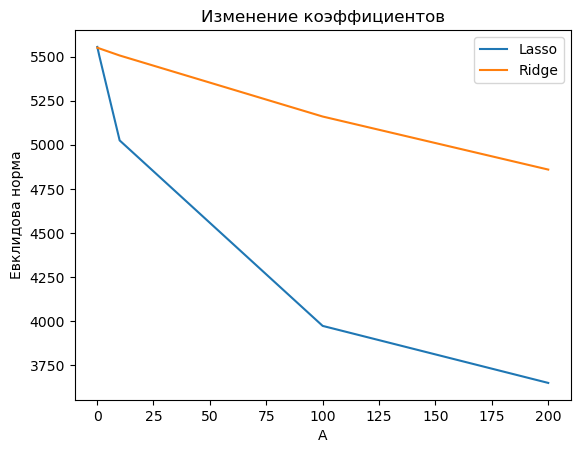

In [67]:
a = [0.1, 1, 10, 100, 200]
lasso_coefs = []
ridge_coefs = []

for alp in a:
    lasso = Lasso(alpha=alp)
    lasso.fit(scaled_X_train, y_train)
    lasso_coefs.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alp)
    ridge.fit(scaled_X_train, y_train)
    ridge_coefs.append(np.linalg.norm(ridge.coef_))

plt.figure()
plt.plot(a, lasso_coefs, label='Lasso')
plt.plot(a, ridge_coefs, label='Ridge')
plt.xlabel('A')
plt.ylabel('Евклидова норма')
plt.title('Изменение коэффициентов')
plt.legend()

In [68]:
#Можно заметить что L1 регуляризация сильнее влияет на снижение веса
#Так происходит, потому что в L1 регуляризации накладываются штрафы
#за большие веса, а незначимые признаки убираются из рассмотрения, напимер как у

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [69]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=a, cv=5)
lasso_cv_model.fit(scaled_X_train, y_train)
avg_mse = np.mean(lasso_cv_model.mse_path_, axis=1)
lasso_cv_model.alphas_[np.argmin(avg_mse)] #ищем минимальную ошибку

1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [70]:
lasso_model_final = Lasso(alpha=1)
lasso_model_final.fit(scaled_X_train, y_train)
coefs_lasso = pd.DataFrame(abs(lasso_model.coef_),X.columns,columns=['Coefficient'])
coefs_lasso[:6].sort_values(by='Coefficient')

,Coefficient
y,0.000000
z,43.265361
table,47.684857
depth,57.093610
x,652.157442
carat,4872.156396


In [71]:
#самым информативным признаком оказался вес алмаза, что довольно очевидно влиет на его цену
#из x, y, z самым значимым оказался x, скорее всего потому что у него наименьшая корреляция с другими признаками
#y коррелирует с depth, а z с table

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [72]:
y_pred_final = lasso_model_final.predict(scaled_X_test)
y_pred_start = lasso_model.predict(scaled_X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_start)))
print(np.sqrt(mean_squared_error(y_test, y_pred_final)))

1120.6556568805972
1115.7350687936878


In [ ]:
#новая модель оказалась немного лучше из-зе регуляризации признаков
#проблема мультиколлинеарности была частична решена использованием L1 регуляризации